In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [4]:
data.shape

(600, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
data.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [10]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

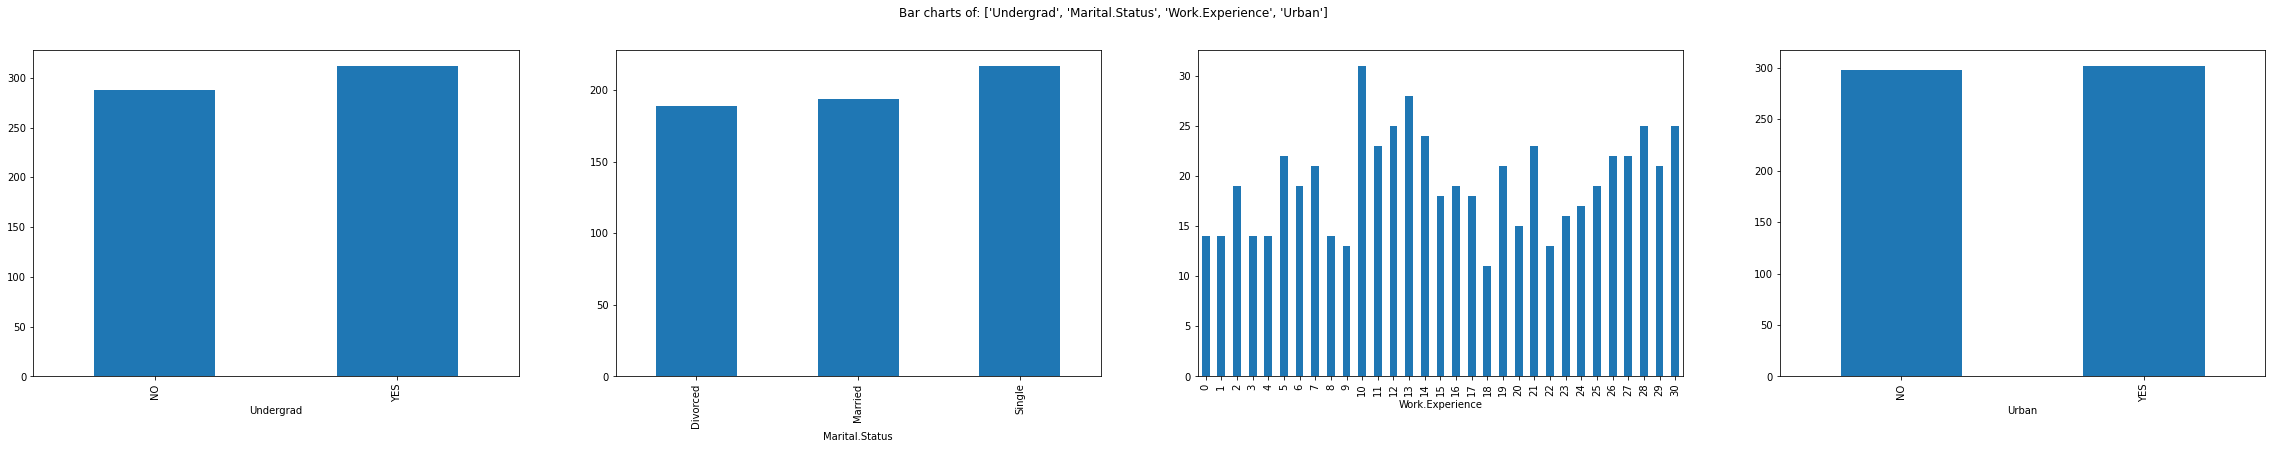

In [12]:
PlotBarCharts(inpData=data, colsToPlot=['Undergrad', 'Marital.Status', 'Work.Experience','Urban'])

array([[<AxesSubplot:title={'center':'Taxable.Income'}>,
        <AxesSubplot:title={'center':'City.Population'}>],
       [<AxesSubplot:title={'center':'Work.Experience'}>, <AxesSubplot:>]],
      dtype=object)

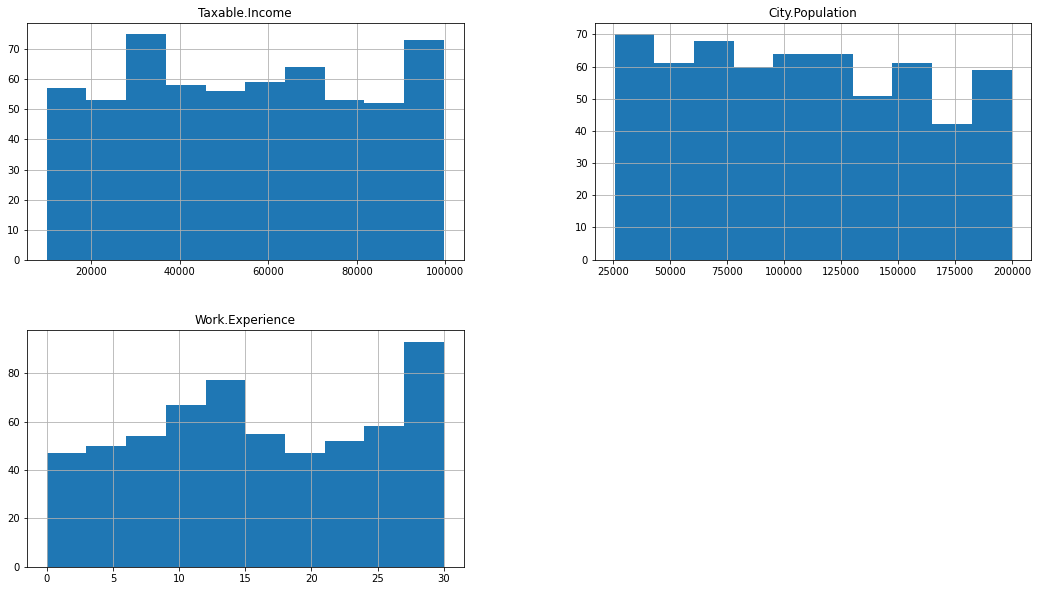

In [13]:
data.hist(['Taxable.Income', 'City.Population','Work.Experience'], figsize=(18,10))

In [14]:
data['Taxable.Income'].astype(float)
tax= data[data.loc[:,"Taxable.Income"] <= 30000]

In [15]:
data['Tax'] = np.where(data['Taxable.Income']<= 30000 ,'Risky', 'Good')

In [16]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


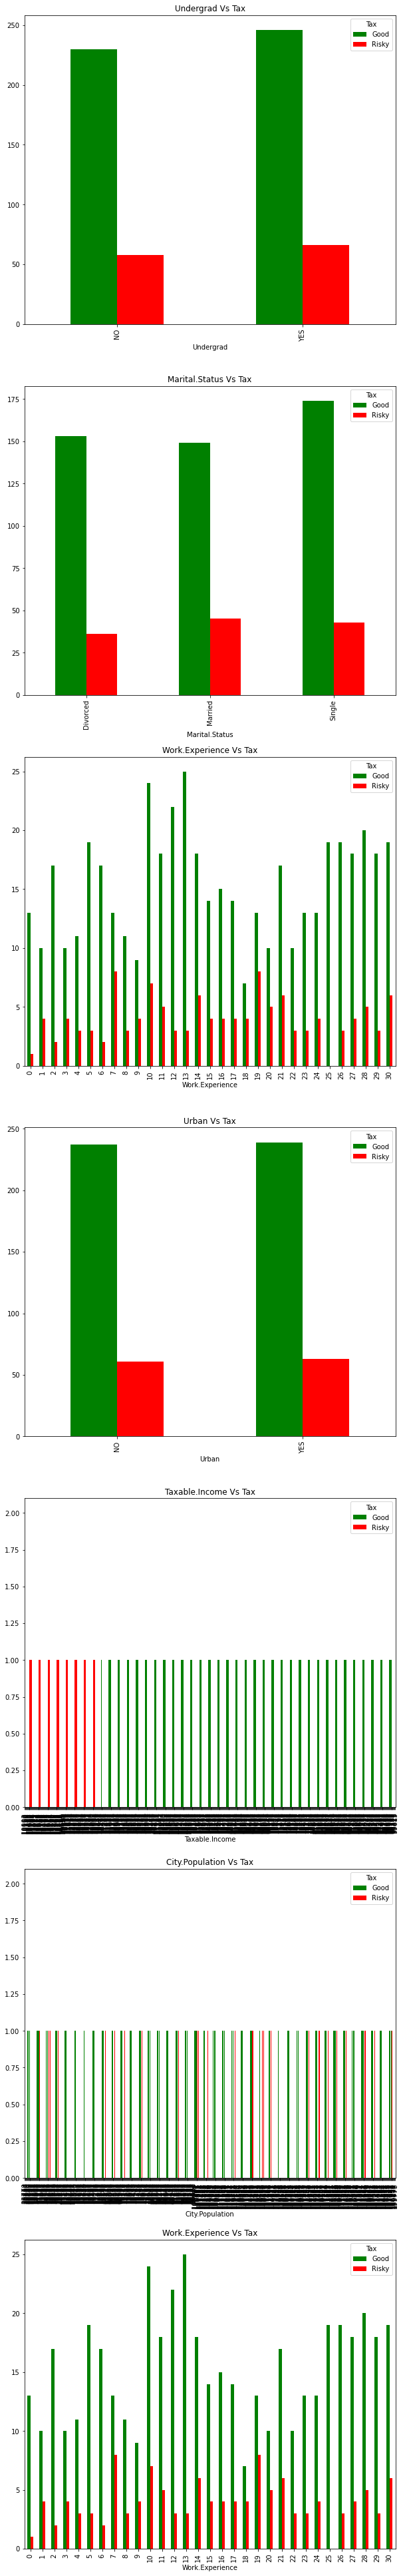

In [17]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Undergrad', 'Marital.Status', 'Work.Experience','Urban',
                    'Taxable.Income', 'City.Population','Work.Experience']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,70))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "SalaryGT50K"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=data[CategoricalCol], columns=data['Tax'])
    CrossTabResult.plot.bar(color=['green','red'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Tax')


In [18]:
X = data.drop('Tax', axis=1)
y = data['Tax']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [35]:
from sklearn.tree import DecisionTreeClassifier as clf
from sklearn import tree
from sklearn import preprocessing
from sklearn import utils
import category_encoders as ce

In [36]:
dt2 = tree.DecisionTreeClassifier(criterion='entropy',random_state=1, max_depth=2)
dt2.fit(X_train, y_train)
dt2_score_train = dt2.score(X_train, y_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(X_test, y_test)
print("Testing score: ",dt2_score_test)
y_pred= dt2.predict(X_test)

Training score:  1.0
Testing score:  1.0


In [37]:
dt = tree.DecisionTreeClassifier(criterion='entropy',random_state=1, max_depth=1)
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)
y_pred= dt.predict(X_test)

Training score:  1.0
Testing score:  1.0


In [38]:
dt3 = tree.DecisionTreeClassifier(criterion='entropy',random_state=1, max_depth=3)
dt3.fit(X_train, y_train)
dt3_score_train = dt3.score(X_train, y_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(X_test, y_test)
print("Testing score: ",dt3_score_test)
y_pred= dt3.predict(X_test)

Training score:  1.0
Testing score:  1.0


|--- feature_5 <= 30055.50
|   |--- class: 0
|--- feature_5 >  30055.50
|   |--- class: 1



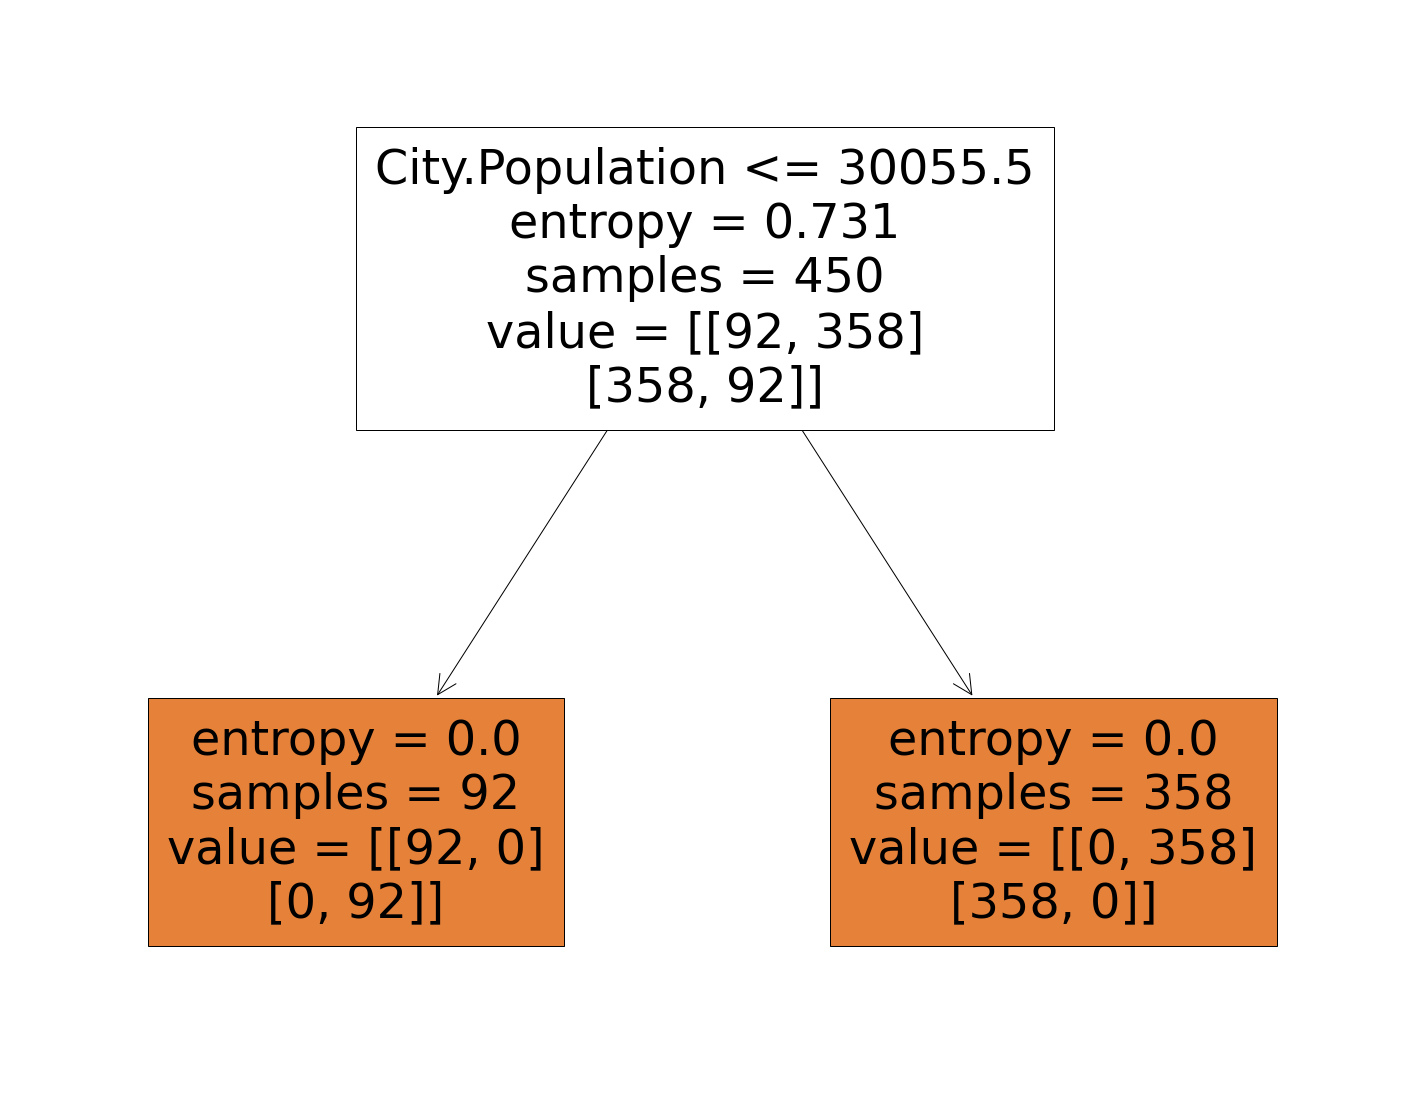

In [39]:
text_representation = tree.export_text(dt)
print(text_representation)
fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(dt, feature_names=CategoricalColsList,filled=True)